# Machine Failure Prediction

## Data Set 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("majorproj/data (1).csv")
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [3]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.8 KB


In [5]:
df.shape

(944, 10)

In [6]:
df.size

9440

In [7]:
df = df.drop_duplicates()
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
enc = LabelEncoder()

for i in range(df.shape[1]):
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])

df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,6,0,5,6,17,2,0,1
1,71,1,2,2,4,1,1,3,0,0
2,29,7,1,1,5,1,5,5,0,0
3,58,4,2,3,4,1,9,5,0,0
4,90,7,4,5,3,0,49,5,0,0


In [9]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,33.015907,3.726405,3.326617,1.939555,4.393425,2.844115,28.027572,3.564157,15.326617,0.416755
std,33.012684,2.678334,1.438551,1.384458,1.269869,2.273751,16.394722,1.599452,5.976014,0.493283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,15.000000,2.000000,13.000000,0.000000
50%,21.000000,3.000000,3.000000,2.000000,5.000000,2.000000,25.000000,3.000000,16.000000,0.000000
75%,64.000000,7.000000,5.000000,3.000000,5.000000,5.000000,39.000000,5.000000,20.000000,1.000000
max,98.000000,7.000000,6.000000,6.000000,6.000000,6.000000,70.000000,6.000000,23.000000,1.000000


## Exploratory Data Analysis

In [10]:
df.corr()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
footfall,1.000000,-0.008931,-0.114961,0.106609,0.048040,-0.162860,-0.051989,-0.035615,-0.100800,-0.167747
tempMode,-0.008931,1.000000,-0.010396,0.002120,-0.014200,-0.051985,0.409347,-0.058593,-0.062990,-0.014043
AQ,-0.114961,-0.010396,1.000000,-0.156912,-0.089594,0.618271,0.094861,-0.105083,0.035119,0.582895
USS,0.106609,0.002120,-0.156912,1.000000,-0.352980,-0.399579,-0.032431,-0.206546,-0.225232,-0.466712
CS,0.048040,-0.014200,-0.089594,-0.352980,1.000000,0.048470,-0.027597,0.185386,0.143640,0.019292
VOC,-0.162860,-0.051985,0.618271,-0.399579,0.048470,1.000000,0.008146,0.104480,0.209769,0.797182
RP,-0.051989,0.409347,0.094861,-0.032431,-0.027597,0.008146,1.000000,-0.158559,-0.077704,0.053840
IP,-0.035615,-0.058593,-0.105083,-0.206546,0.185386,0.104480,-0.158559,1.000000,0.372307,0.086497
Temperature,-0.100800,-0.062990,0.035119,-0.225232,0.143640,0.209769,-0.077704,0.372307,1.000000,0.191091
fail,-0.167747,-0.014043,0.582895,-0.466712,0.019292,0.797182,0.053840,0.086497,0.191091,1.000000


In [11]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


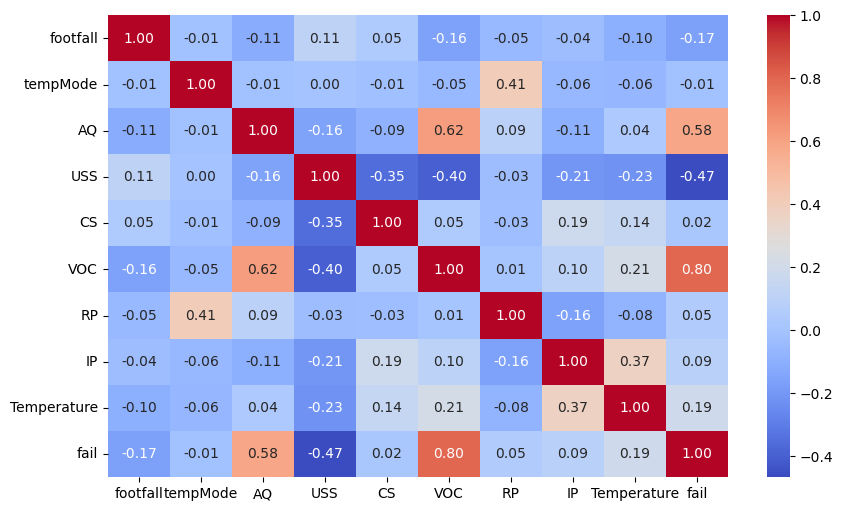

In [12]:
%pip install seaborn
import seaborn as sns
import numpy as np

corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**1. The below analysis shows the count of value of each sensor data readings**

In [13]:
temp = df['Temperature'].value_counts()
temp.sort_index(inplace = True)
temp

Temperature
0      19
1      12
2      17
3      19
4      18
5      13
6      11
7      17
8      10
9      15
10     23
11     35
12     26
13     39
14     68
15     70
16     62
17     48
18     51
19    100
20    102
21     53
22     47
23     68
Name: count, dtype: int64

Text(0, 0.5, 'value')

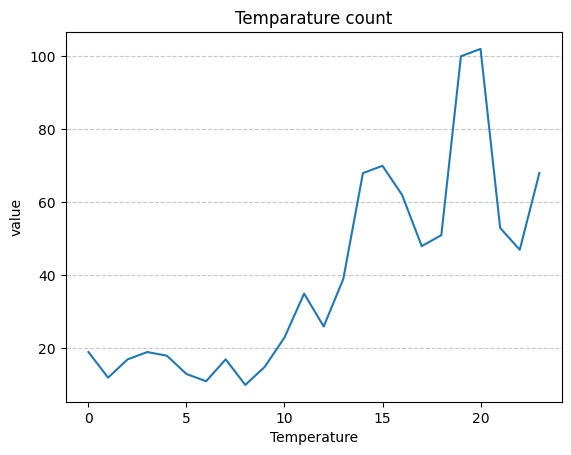

In [14]:
plt.plot(temp)
plt.title("Temparature count")
plt.xlabel("Temperature")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel("value")

In [15]:
tmode = df['tempMode'].value_counts()
tmode.sort_index(inplace = True)
tmode

tempMode
0    161
1    100
2    112
3    101
4     66
5     83
6     32
7    288
Name: count, dtype: int64

Text(0, 0.5, 'value')

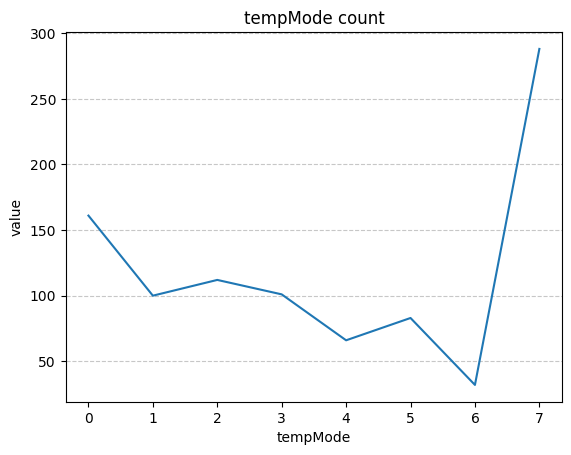

In [16]:
plt.plot(tmode)
plt.title("tempMode count")
plt.xlabel("tempMode")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel("value")

In [17]:
aq = df['AQ'].value_counts()
aq.sort_index(inplace = True)
aq

AQ
0     16
1    103
2    146
3    256
4    170
5    218
6     34
Name: count, dtype: int64

Text(0, 0.5, 'value')

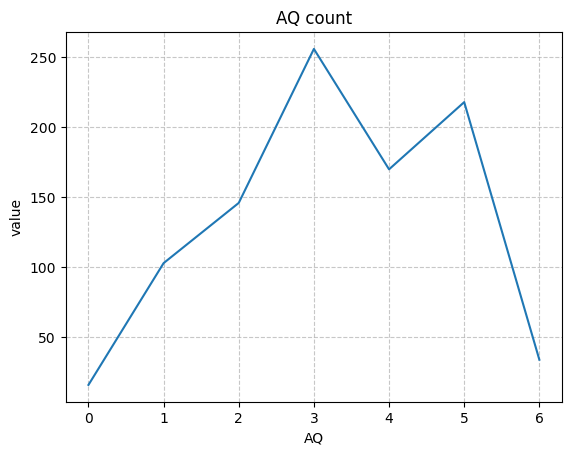

In [18]:
plt.plot(aq)
plt.title("AQ count")
plt.xlabel("AQ")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("value")

In [19]:
uss = df['USS'].value_counts()
uss.sort_index(inplace = True)
uss

USS
0    109
1    317
2    235
3    160
4     67
5     36
6     19
Name: count, dtype: int64

Text(0, 0.5, 'value')

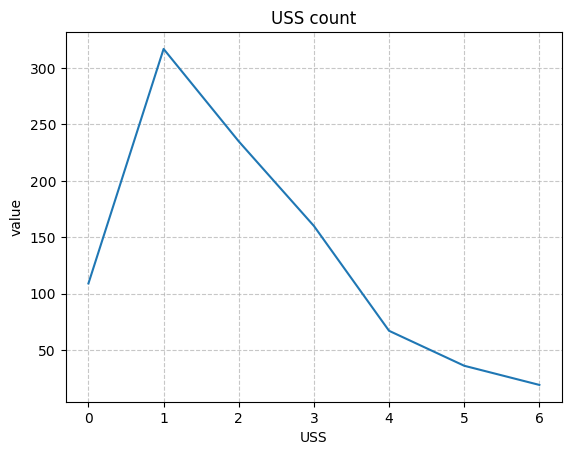

In [20]:
plt.plot(uss)
plt.title("USS count")
plt.xlabel("USS")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("value")

In [21]:
cs = df['CS'].value_counts()
cs.sort_index(inplace = True)
cs

CS
0     13
1     31
2     43
3     87
4    195
5    459
6    115
Name: count, dtype: int64

Text(0, 0.5, 'value')

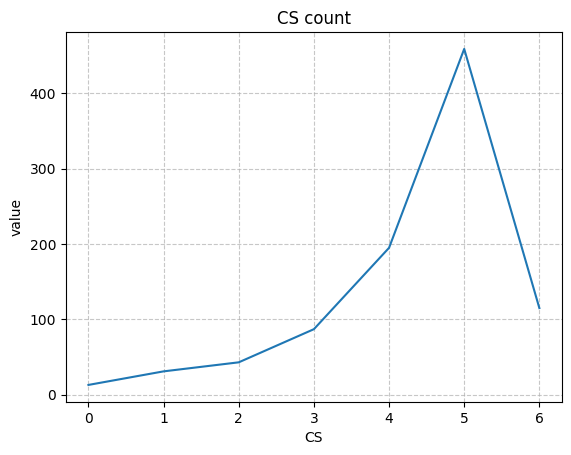

In [22]:
plt.plot(cs)
plt.title("CS count")
plt.xlabel("CS")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("value")

In [23]:
voc = df['VOC'].value_counts()
voc.sort_index(inplace = True)
voc

VOC
0    200
1    179
2    108
3     37
4     94
5    150
6    175
Name: count, dtype: int64

Text(0, 0.5, 'value')

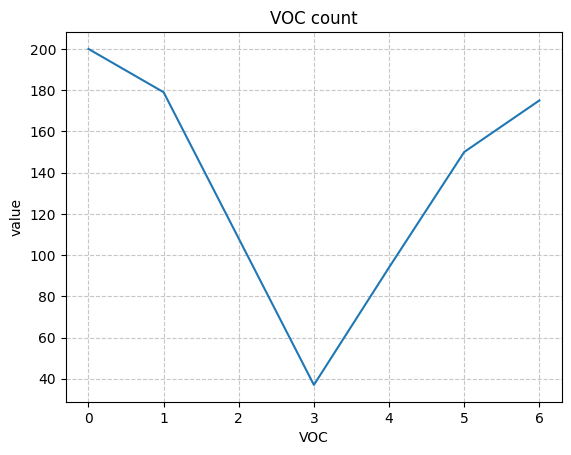

In [24]:
plt.plot(voc)
plt.title("VOC count")
plt.xlabel("VOC")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("value")

In [25]:
ip = df['IP'].value_counts()
ip.sort_index(inplace = True)
ip

IP
0     13
1     52
2    248
3    187
4     90
5    226
6    127
Name: count, dtype: int64

Text(0, 0.5, 'value')

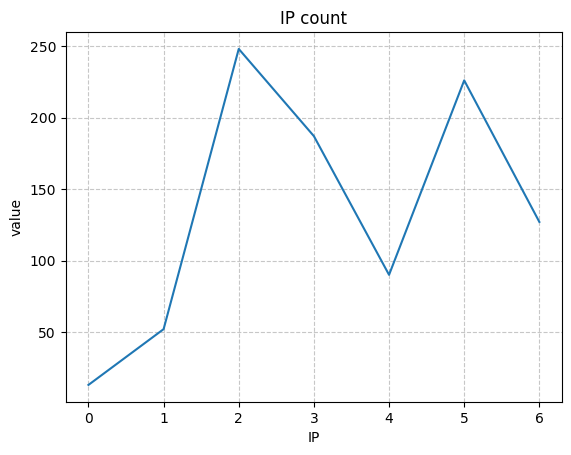

In [26]:
plt.plot(ip)
plt.title("IP count")
plt.xlabel("IP")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel("value")

**2) Below graphs shows the affect of each value or average of sensor data on the failure of machines**

In [27]:
failure = df.groupby(by = 'Temperature')['fail'].value_counts()

In [28]:
failure

Temperature  fail
0            0       16
             1        3
1            0       11
             1        1
2            0       13
             1        4
3            0       14
             1        5
4            0       13
             1        5
5            1        7
             0        6
6            0        8
             1        3
7            0       12
             1        5
8            0        7
             1        3
9            0       13
             1        2
10           0       16
             1        7
11           0       23
             1       12
12           0       16
             1       10
13           0       28
             1       11
14           0       43
             1       25
15           0       40
             1       30
16           0       33
             1       29
17           0       26
             1       22
18           0       32
             1       19
19           0       50
             1       50
20           1       5

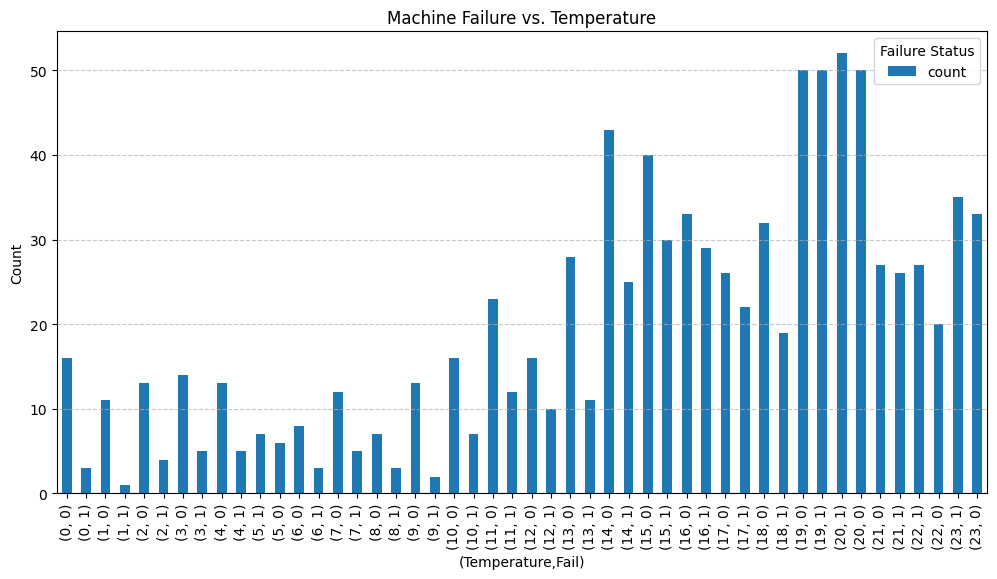

In [29]:
failure.plot(kind='bar', figsize=(12, 6))

plt.title("Machine Failure vs. Temperature")
plt.xlabel("(Temperature,Fail)")
plt.ylabel("Count")
plt.legend(title="Failure Status")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

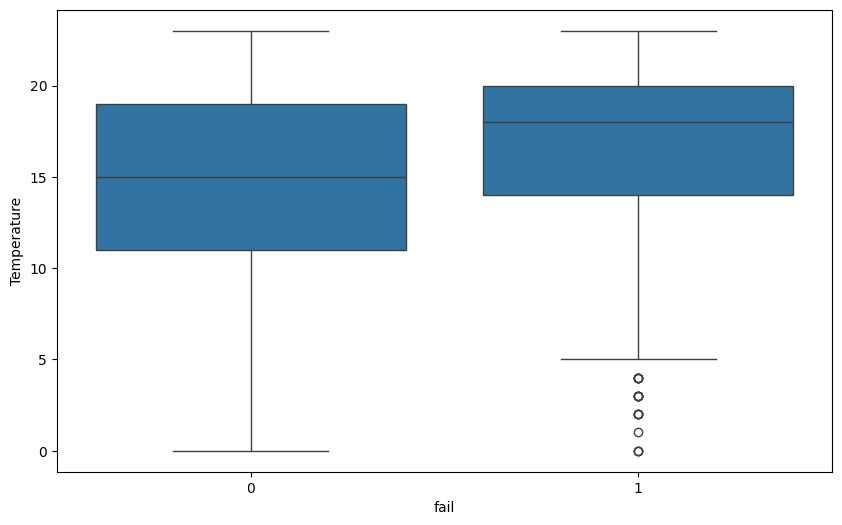

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="fail", y="Temperature", data=df)
plt.show()

In [31]:
failure1 = df.groupby(by='fail')['footfall'].mean()
failure1

fail
0    37.694545
1    26.468193
Name: footfall, dtype: float64

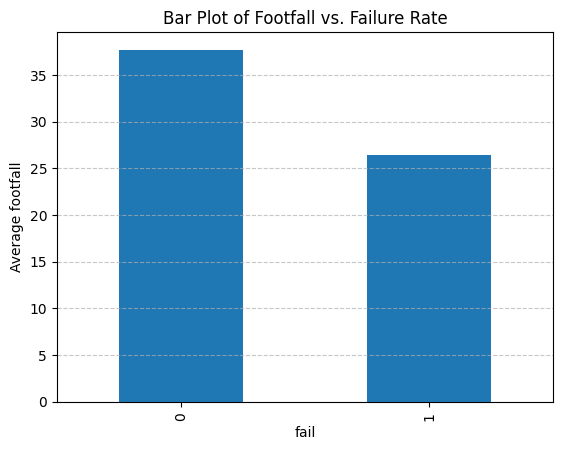

In [32]:
failure1 = df.groupby(by='fail')['footfall'].mean().plot(kind="bar")
plt.title("Bar Plot of Footfall vs. Failure Rate")
plt.ylabel("Average footfall")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [33]:
failure2 = df.groupby(by = 'AQ')['fail'].value_counts()
failure2

AQ  fail
0   0        15
    1         1
1   0       100
    1         3
2   0       135
    1        11
3   0       183
    1        73
4   1        97
    0        73
5   1       183
    0        35
6   1        25
    0         9
Name: count, dtype: int64

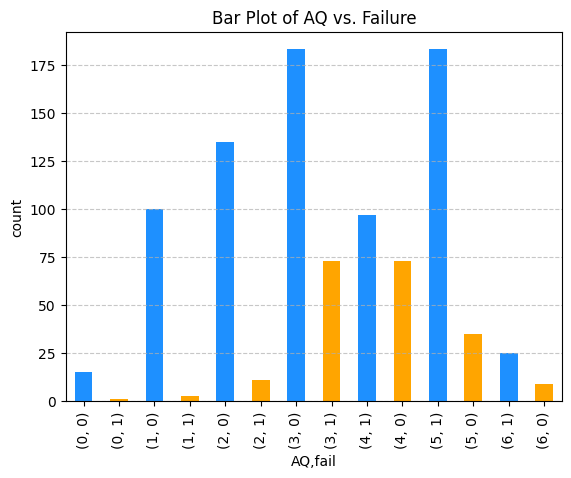

In [64]:
colors = ["dodgerblue", "orange"]
failure2.plot(kind="bar", color=[colors[i % 2] for i in range(len(failure2))])
plt.title("Bar Plot of AQ vs. Failure")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [59]:
failure3 = df.groupby(by = 'USS')['fail'].value_counts()
failure3

USS  fail
0    1        94
     0        15
1    1       191
     0       126
2    0       166
     1        69
3    0       134
     1        26
4    0        56
     1        11
5    0        35
     1         1
6    0        18
     1         1
Name: count, dtype: int64

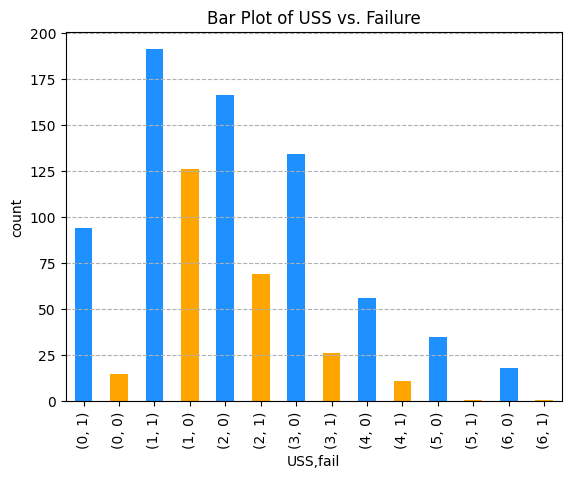

In [65]:
colors = ["dodgerblue", "orange"]
failure3.plot(kind="bar", color=[colors[i % 2] for i in range(len(failure3))])
plt.title("Bar Plot of USS vs. Failure")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--")
plt.show()

In [61]:
failure4 = df.groupby(by = 'VOC')['fail'].value_counts()
failure4

VOC  fail
0    0       197
     1         3
1    0       168
     1        11
2    0       101
     1         7
3    0        26
     1        11
4    1        70
     0        24
5    1       124
     0        26
6    1       167
     0         8
Name: count, dtype: int64

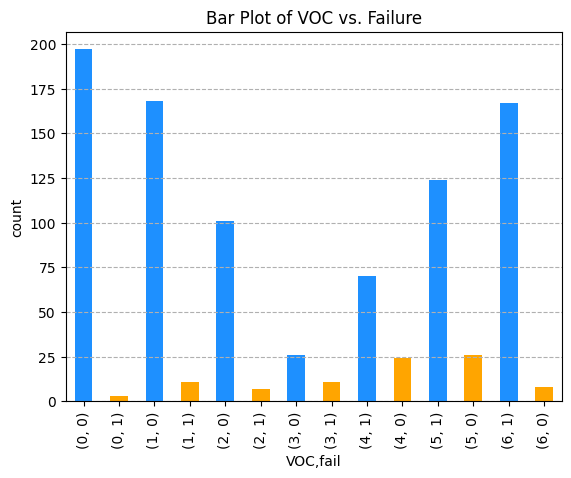

In [66]:
colors = ["dodgerblue", "orange"]
failure4.plot(kind="bar", color=[colors[i % 2] for i in range(len(failure4))])
plt.title("Bar Plot of VOC vs. Failure")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--")
plt.show()

In [39]:
failure5 = df.groupby(by='fail')['RP'].mean()
failure5

fail
0    27.281818
1    29.071247
Name: RP, dtype: float64

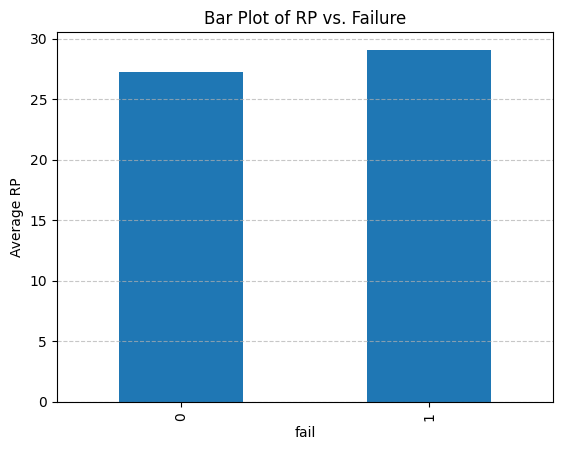

In [67]:
failure5.plot(kind="bar")
plt.title("Bar Plot of RP vs. Failure")
plt.ylabel("Average RP")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [41]:
failure6 = df.groupby(by = 'IP')['fail'].value_counts()
failure6

IP  fail
0   0        10
    1         3
1   0        38
    1        14
2   0       153
    1        95
3   0       106
    1        81
4   0        53
    1        37
5   0       118
    1       108
6   0        72
    1        55
Name: count, dtype: int64

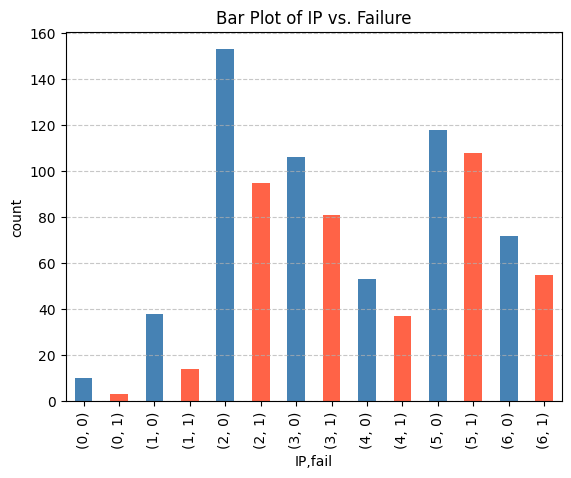

In [68]:
colors = ["steelblue", "tomato"]
failure6.plot(kind="bar", color=[colors[i % 2] for i in range(len(failure6))])
plt.title("Bar Plot of IP vs. Failure")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [43]:
failure7 = df.groupby(by = 'tempMode')['fail'].value_counts()
failure7

tempMode  fail
0         0        94
          1        67
1         0        54
          1        46
2         0        59
          1        53
3         0        70
          1        31
4         0        37
          1        29
5         0        51
          1        32
6         1        19
          0        13
7         0       172
          1       116
Name: count, dtype: int64

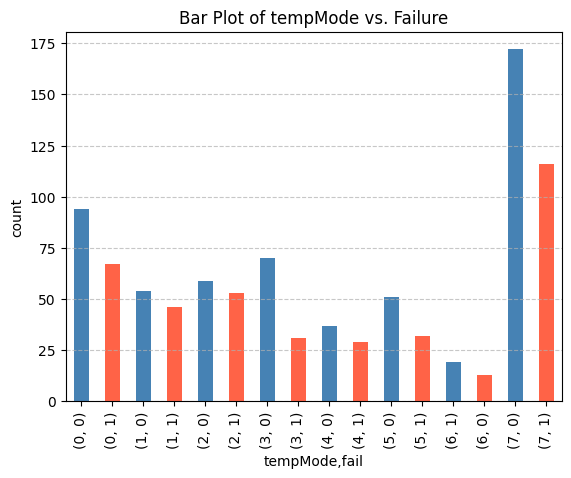

In [69]:
colors = ["steelblue", "tomato"]
failure7.plot(kind="bar", color=[colors[i % 2] for i in range(len(failure7))])
plt.title("Bar Plot of tempMode vs. Failure")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [45]:
failure8 = df.groupby(by = 'CS')['fail'].value_counts()
failure8

CS  fail
0   0        11
    1         2
1   0        29
    1         2
2   0        31
    1        12
3   0        55
    1        32
4   1       121
    0        74
5   0       247
    1       212
6   0       103
    1        12
Name: count, dtype: int64

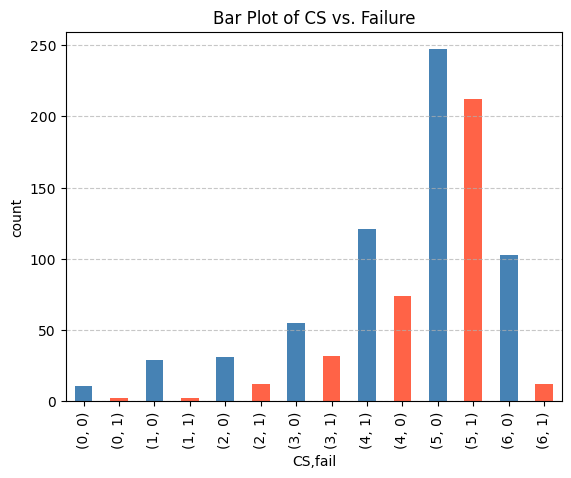

In [71]:
colors = ["steelblue", "tomato"]
failure8.plot(kind="bar", color=[colors[i % 2] for i in range(len(failure8))])
plt.title("Bar Plot of CS vs. Failure")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**The below gives a comparitive analysis on how the average sensor readings of each sensor leads to either failure or no failure in machine**

<Figure size 1200x600 with 0 Axes>

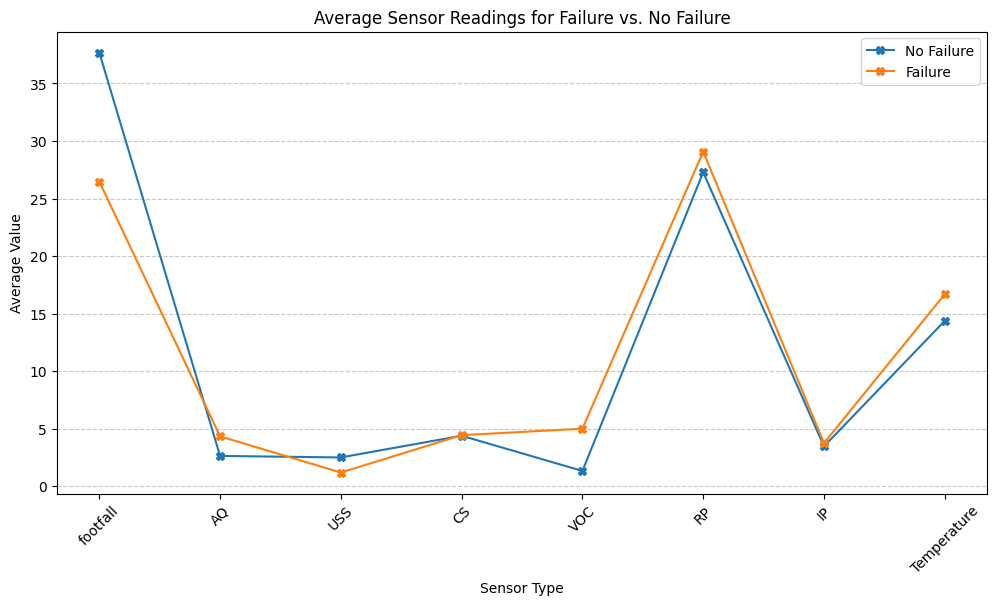

In [47]:
sensor_columns = ["footfall", "AQ", "USS", "CS", "VOC", "RP", "IP", "Temperature"]
df_grouped = df.groupby("fail")[sensor_columns].mean().T

plt.figure(figsize=(12, 6))
df_grouped.plot(kind="line", marker="X", figsize=(12, 6))
plt.title("Average Sensor Readings for Failure vs. No Failure")
plt.xlabel("Sensor Type")
plt.ylabel("Average Value")
plt.legend(["No Failure", "Failure"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

## Model Training and evaluation

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [49]:
X = df.drop('fail', axis=1) # feature columns
y = df['fail']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [51]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       127
           1       0.88      0.89      0.89       109

    accuracy                           0.89       236
   macro avg       0.89      0.89      0.89       236
weighted avg       0.89      0.89      0.89       236



In [53]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8940677966101694


In [54]:
import pandas as pd
import numpy as np

input_values = pd.DataFrame({
    'footfall': [0],
    'tempMode': [7],
    'AQ': [7],
    'USS': [1],
    'CS': [6],
    'VOC': [6],
    'RP': [36],
    'IP': [3],
    'Temperature': [1]
})

prediction = model.predict(input_values)
if prediction[0] == 1:
    print("The machine is predicted to fail.")
else:
    print("The machine is predicted to not fail.")

The machine is predicted to fail.


In [55]:
import pandas as pd
import numpy as np

input_values = pd.DataFrame({
    'footfall': [1600],
    'tempMode': [0],
    'AQ': [3],
    'USS': [2],
    'CS': [4],
    'VOC': [4],
    'RP': [26],
    'IP': [2],
    'Temperature': [1]
})
prediction = model.predict(input_values)
if prediction[0] == 1:
    print("The machine is predicted to fail.")
else:
    print("The machine is predicted to not fail.")

The machine is predicted to not fail.
